## Principle of Statistical Modeling
## Prof. Dr. Stefan Kettemann
## Spring term 2023
### Final Project
### From: Habtegiorgis Mengistie

# Predictive compressive strength of concrete

### Importing Libraries And Packages

In [ ]:
#! pip install pandas_profiling

In [ ]:
# importing the Packages
import pandas as pd
import numpy as np
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp
import missingno as msno
import plotly.express as px
import os
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
#modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor

### Reading The Dataset

In [ ]:
df = pd.read_csv("Concrete_Data.csv")

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


###  Rename the names of the column headers

In [ ]:
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
        'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'concrete_strength'}
df.rename(columns=columns,inplace=True)

In [ ]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   concrete_strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Descriptive Statistics

In [ ]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Missing Values

In [ ]:
df.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
concrete_strength     0
dtype: int64

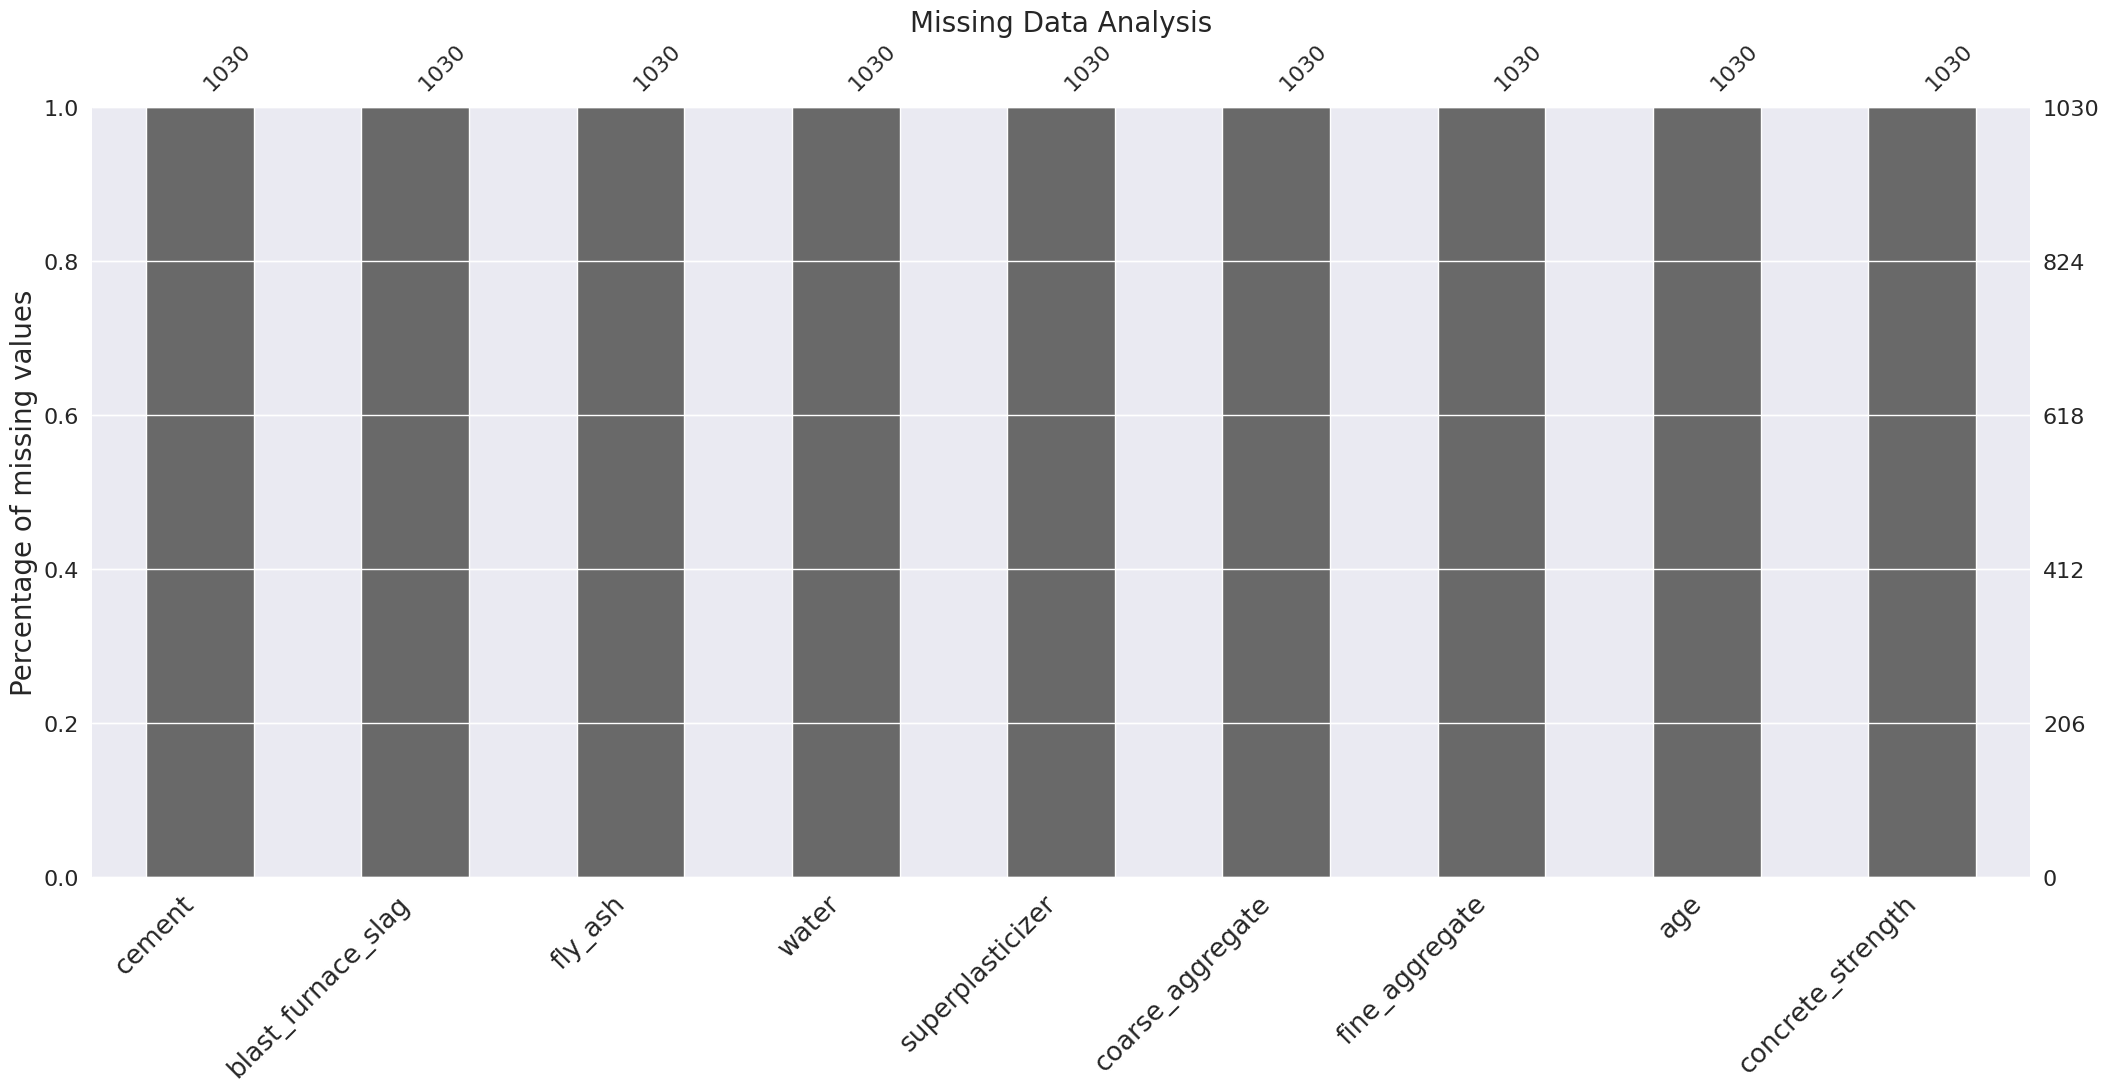

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Create a bar plot of the percentage of missing values for each column
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.ylabel('Percentage of missing values', fontsize=20)
plt.title('Missing Data Analysis', fontsize=20)
missing_bar = msno.bar(df)
missing_bar.set_xticklabels(missing_bar.get_xticklabels(), rotation=45, fontsize=19)
plt.show()


<font size=4> Observations <font>
- The dataset was already relatively clean, with no missing values.

### outliers

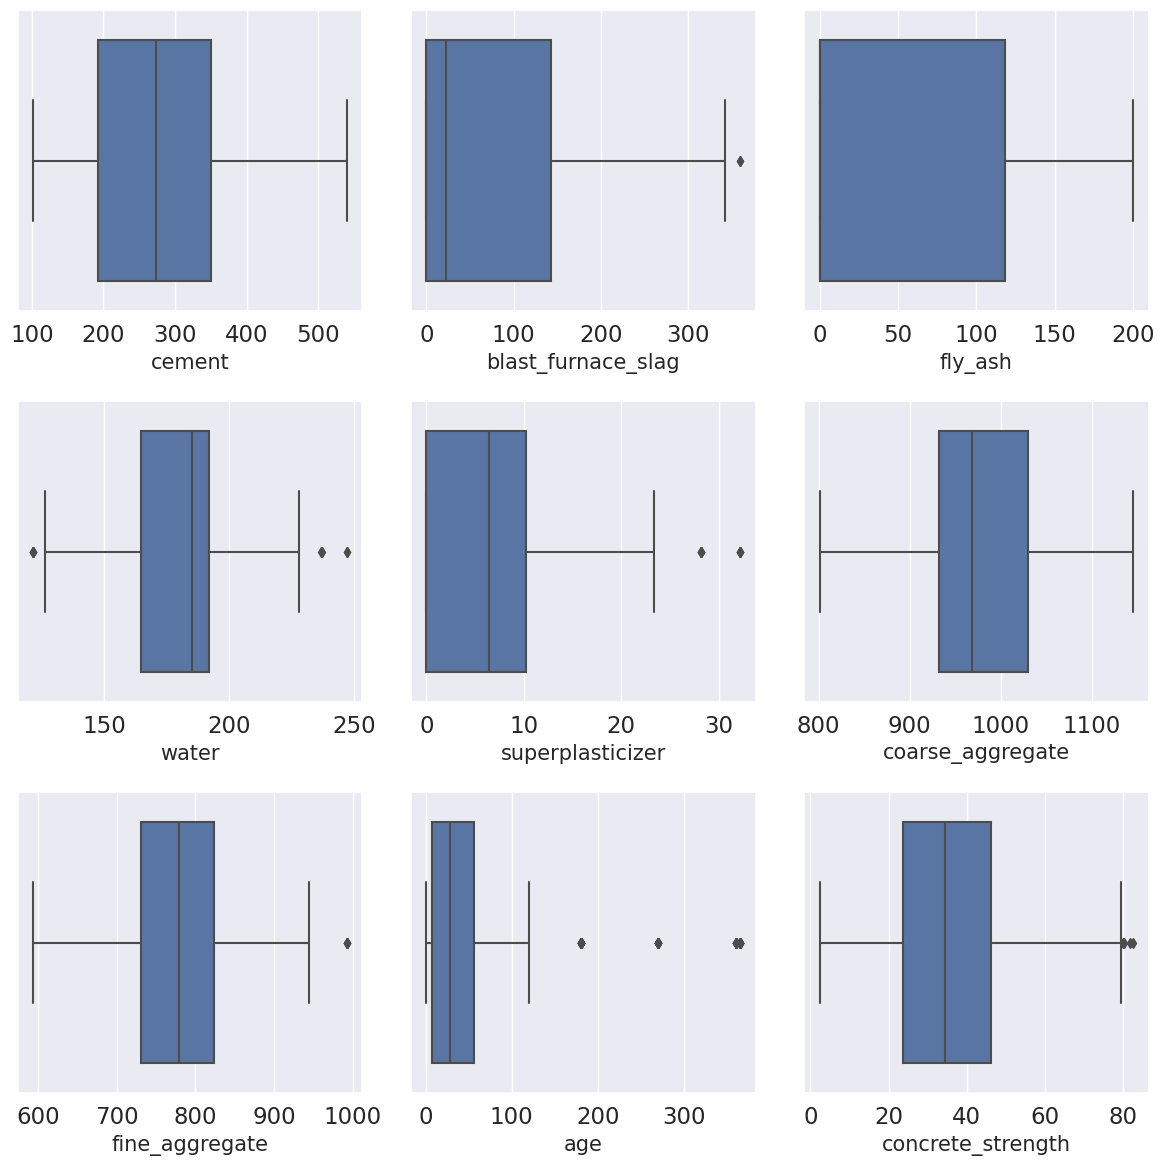

In [ ]:
# Set up the figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Flatten the axes to iterate through them
axes = axes.flatten()

# Loop through each column and create a box plot
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(col, fontsize=15)
    axes[i].set_ylabel('')

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Number of outliers from the original dataset
outlier_num_list = []
for col in df.columns:
    outlier_num = df[((df[col] - df[col].mean())/ df[col].std())> 3][col].count()
    outlier_num_list.append(outlier_num)
outliers_df = pd.DataFrame(df.columns, columns = ['Features'])
outliers_df['outliers_num'] = outlier_num_list
outliers_df['outliers_perc'] = (outliers_df['outliers_num'] / len(df)) * 100
outliers_df.sort_values(by = 'outliers_perc', ascending = False)

,Features,outliers_num,outliers_perc
7,age,33,3.203883
4,superplasticizer,10,0.970874
1,blast_furnace_slag,4,0.388350
3,water,2,0.194175
0,cement,0,0.000000
2,fly_ash,0,0.000000
5,coarse_aggregate,0,0.000000
6,fine_aggregate,0,0.000000
8,concrete_strength,0,0.000000


A proper distribution can be seen with no more than 10% of outliers in any attribute.

## Feature Engineering

### Distribution Analysis

#### Histogram Plot

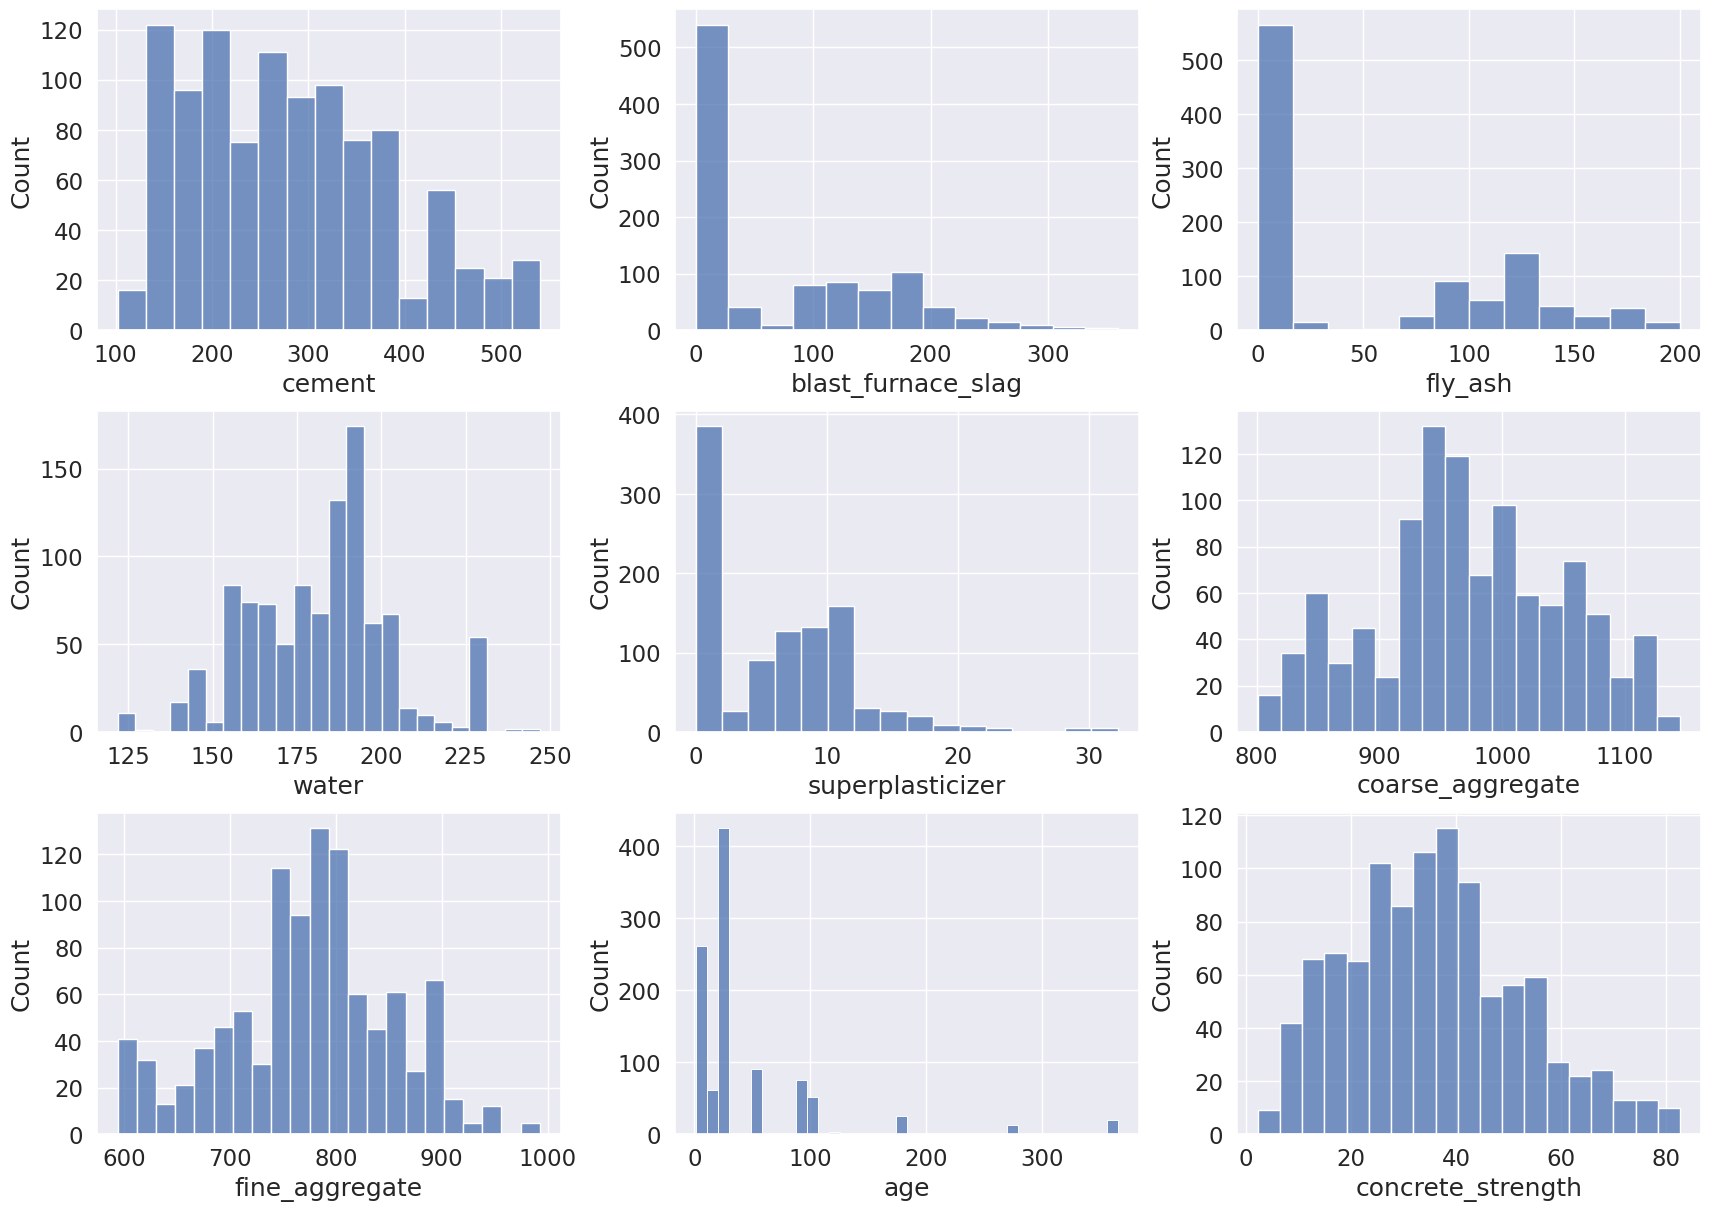

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3, figsize=(17,12), constrained_layout=True)
ax=ax.flatten()
sns.set_style("darkgrid")
for num, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[num])
plt.show()

### Distribution plot by Defualt

<ipython-input-60-794d01bdba45>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-60-794d01bdba45>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-60-794d01bdba45>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

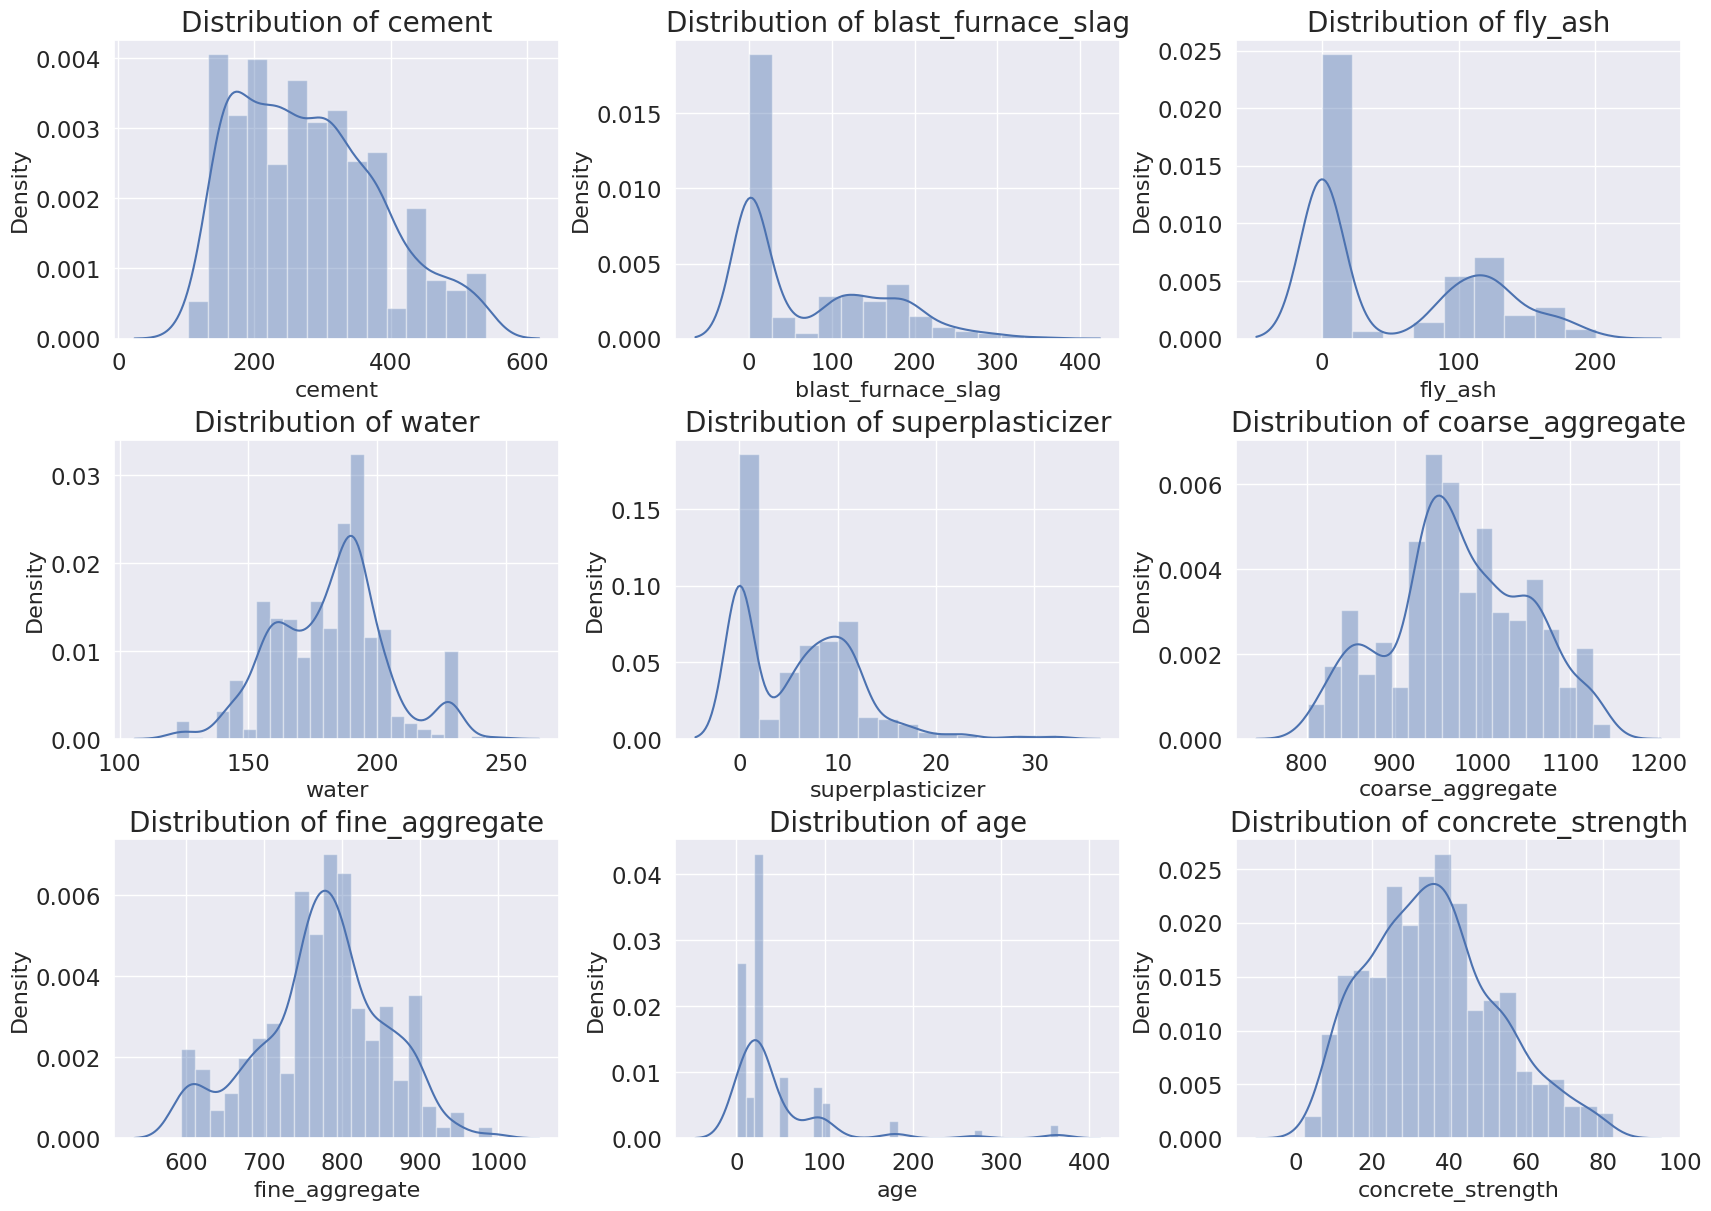

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(17, 12), constrained_layout=True)
ax = ax.flatten()
sns.set_style("darkgrid")
for num, col in enumerate(df.columns):
    sns.distplot(df[col], ax=ax[num])
    ax[num].set_xlabel(col, fontsize=16)
    ax[num].set_ylabel("Density", fontsize=16)
    ax[num].set_title("Distribution of " + col, fontsize=20)
plt.show()


In [ ]:
# define distributions to test
distributions = [
    stats.norm,
    stats.lognorm,
    stats.gamma,
    stats.beta,
    stats.expon,
    stats.uniform,
    stats.weibull_min, # add Weibull distribution
]

# initialize variables to store best fit and parameters for each feature
best_dist_dict = {}
best_mse_dict = {}
best_params_dict = {}

# loop over all features in dataset
for col in df.columns:
    # fit each distribution to feature's data and calculate MSE
    data = df[col]
    bin_counts, bin_edges = np.histogram(data, bins='auto', density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    pmf = bin_counts / np.sum(bin_counts)
    mse_values = []
    for dist in distributions:
        param = dist.fit(data)
        pdf = dist.pdf(bin_centers, *param)
        mse = np.mean((pmf - pdf)**2)
        mse_values.append(mse)
        if mse == min(mse_values):
            best_dist = dist
            best_params = param
    # store best fit and parameters for each feature
    best_dist_dict[col] = best_dist.name
    best_mse_dict[col] = min(mse_values)
    best_params_dict[col] = tuple(round(p, 3) for p in best_params)

# create data frame summarizing best fits and estimated parameters for each feature
dist_summary = pd.DataFrame({'Best Fit': best_dist_dict, 'MSE': best_mse_dict, 'Estimated Parameters': best_params_dict})

# print overall best fit and estimated parameters for each feature
for col in df.columns:
    print(f"Feature: {col}")
    print(f"Best fit: {best_dist_dict[col]}, MSE: {best_mse_dict[col]:.6f}")
    print(f"Estimated parameters: {best_params_dict[col]}\n")

print('Distribution Summary:')
display(dist_summary)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



Feature: cement
Best fit: gamma, MSE: 0.005430
Estimated parameters: (3.16, 84.945, 62.095)

Feature: blast_furnace_slag
Best fit: gamma, MSE: 0.022132
Estimated parameters: (0.576, -0.0, 42.438)

Feature: fly_ash
Best fit: gamma, MSE: 0.025915
Estimated parameters: (0.417, -0.0, 33.397)

Feature: water
Best fit: norm, MSE: 0.002647
Estimated parameters: (181.567, 21.344)

Feature: superplasticizer
Best fit: gamma, MSE: 0.005237
Estimated parameters: (0.425, -0.0, 4.053)

Feature: coarse_aggregate
Best fit: norm, MSE: 0.003790
Estimated parameters: (972.919, 77.716)

Feature: fine_aggregate
Best fit: beta, MSE: 0.003079
Estimated parameters: (85.887, 24.712, -804.074, 2031.586)

Feature: age
Best fit: lognorm, MSE: 0.005974
Estimated parameters: (1.253, 0.579, 22.471)

Feature: concrete_strength
Best fit: lognorm, MSE: 0.002281
Estimated parameters: (0.213, -42.652, 76.72)

Distribution Summary:


,Best Fit,MSE,Estimated Parameters
cement,gamma,0.005430,"(3.16, 84.945, 62.095)"
blast_furnace_slag,gamma,0.022132,"(0.576, -0.0, 42.438)"
fly_ash,gamma,0.025915,"(0.417, -0.0, 33.397)"
water,norm,0.002647,"(181.567, 21.344)"
superplasticizer,gamma,0.005237,"(0.425, -0.0, 4.053)"
coarse_aggregate,norm,0.003790,"(972.919, 77.716)"
fine_aggregate,beta,0.003079,"(85.887, 24.712, -804.074, 2031.586)"
age,lognorm,0.005974,"(1.253, 0.579, 22.471)"
concrete_strength,lognorm,0.002281,"(0.213, -42.652, 76.72)"


#### Plot the best fit distribution line

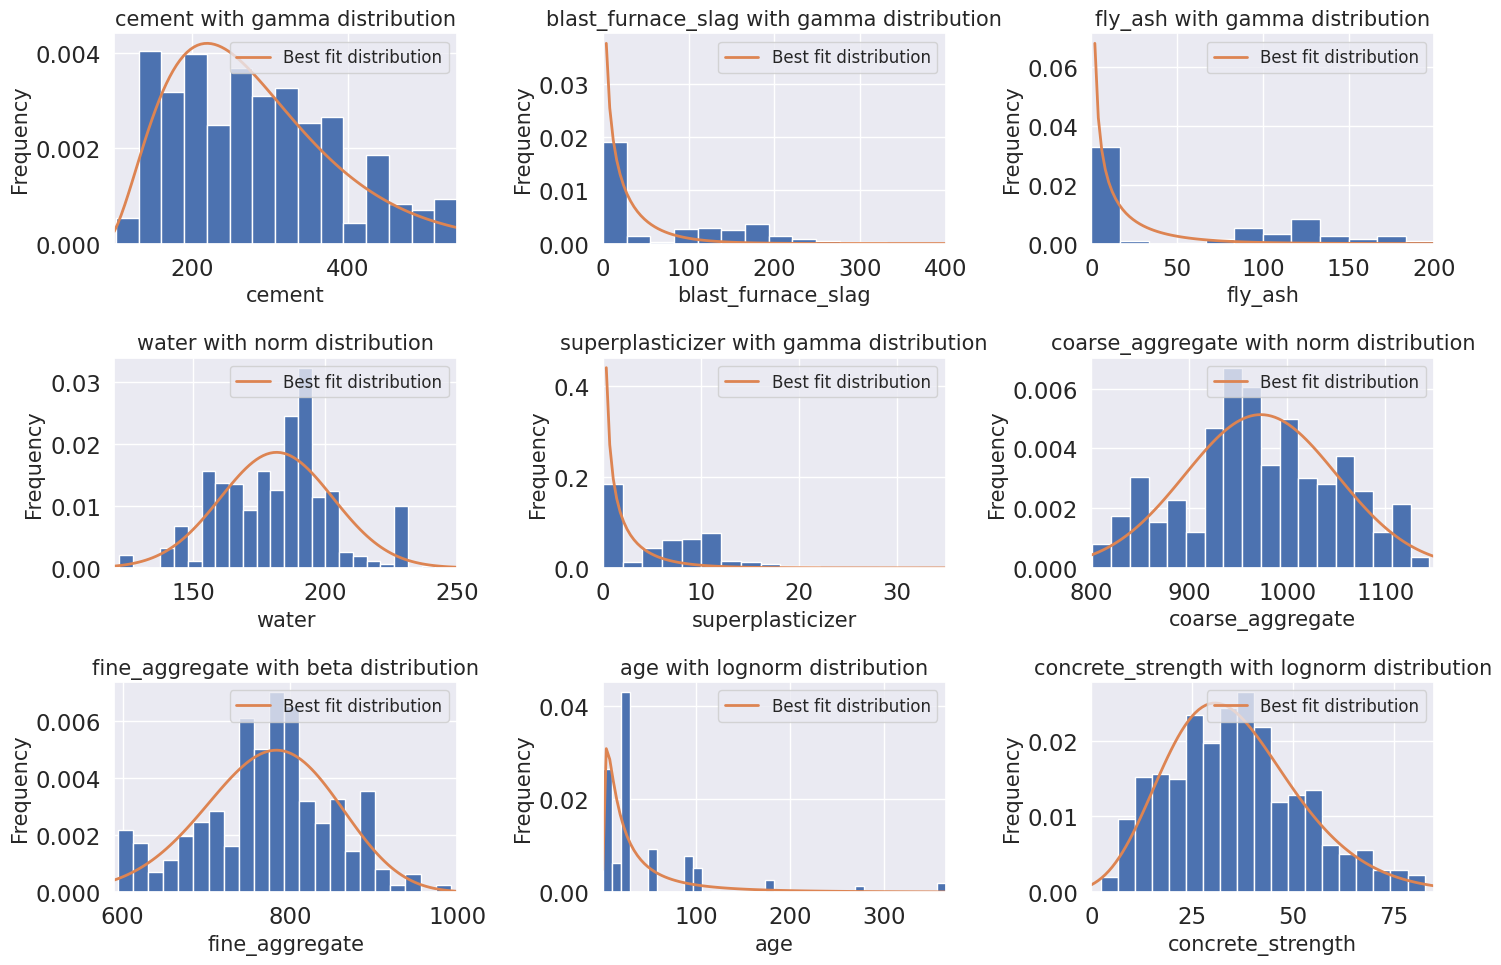

In [ ]:
import matplotlib.pyplot as plt

# define the range of x-axis for each feature plot
x_ranges = {
    'cement': [100, 540],
    'blast_furnace_slag': [0, 400],
    'fly_ash': [0, 200],
    'water': [120, 250],
    'superplasticizer': [0, 35],
    'coarse_aggregate': [800, 1150],
    'fine_aggregate': [590, 1000],
    'age': [1, 365],
    'concrete_strength': [0, 85]
}

# loop over all features in dataset
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(df.columns):
    # get best fit and parameters for each feature
    best_dist_name = best_dist_dict[col]
    best_params = best_params_dict[col]
    best_dist = getattr(stats, best_dist_name)
    # plot histogram of data
    ax = axs[i//3, i%3]
    ax.hist(df[col], bins='auto', density=True)
    ax.set_xlim(x_ranges[col])
    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel('Frequency', fontsize=15)
    ax.set_title(f'{col} with {best_dist_name} distribution', fontsize=15)
    # plot the best fit distribution line
    x = np.linspace(*x_ranges[col], num=100)
    pdf = best_dist.pdf(x, *best_params)
    ax.plot(x, pdf, label='Best fit distribution', linewidth=2)
    ax.legend(fontsize=12)
plt.tight_layout()
plt.show()


### Cumulative distribution function

The cumulative distribution function (CDF) is an important concept in probability theory and statistics. It is defined as the probability that a random variable takes on a value less than or equal to a certain value. In other words, the CDF gives the probability distribution of a random variable in terms of the probabilities of its values being less than or equal to different levels.

In [ ]:
# creating a function to calculate cumulative distribution function
def cdf(df):
    n=len(df)
    x=np.sort(df)
    y=np.arange(1,1+n)/n
    return x,y

# calculating the cdf for y
x_label,y_label=cdf(df['concrete_strength'])

fig=px.scatter(x=x_label,y=y_label)

fig.update_layout(title='CDF of concrete compressive strength ',
                  xaxis_title='Concrete Compressive Strength (MPa)',
                  yaxis_title='CDF',
                  legend_title='Legend',
                  font=dict(size=14),
                  plot_bgcolor='white')

fig.show()


### statistics for each feature (mean, std, skewness and kurtosis)

In [ ]:
# calculate the statistics for each feature
stats_list = []
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std()
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    stats = {"feature": col, "mean": mean, "std": std, "skewness": skewness, "kurtosis": kurtosis}
    stats_list.append(stats)

# create a DataFrame from the list of dictionaries
df_stats = pd.DataFrame(stats_list)

# print the DataFrame
print(df_stats)

              feature        mean         std  skewness   kurtosis
0              cement  281.167864  104.506364  0.509481  -0.520652
1  blast_furnace_slag   73.895825   86.279342  0.800717  -0.508175
2             fly_ash   54.188350   63.997004  0.537354  -1.328746
3               water  181.567282   21.354219  0.074628   0.122082
4    superplasticizer    6.204660    5.973841  0.907203   1.411269
5    coarse_aggregate  972.918932   77.753954 -0.040220  -0.599016
6      fine_aggregate  773.580485   80.175980 -0.253010  -0.102177
7                 age   45.662136   63.169912  3.269177  12.168989
8   concrete_strength   35.817961   16.705742  0.416977  -0.313725


# Correlation Analysis#

### correlation between the input features

In [ ]:
# spliting the data to X(features) and y(label)
X=df.drop('concrete_strength',axis=1)
y=df['concrete_strength']

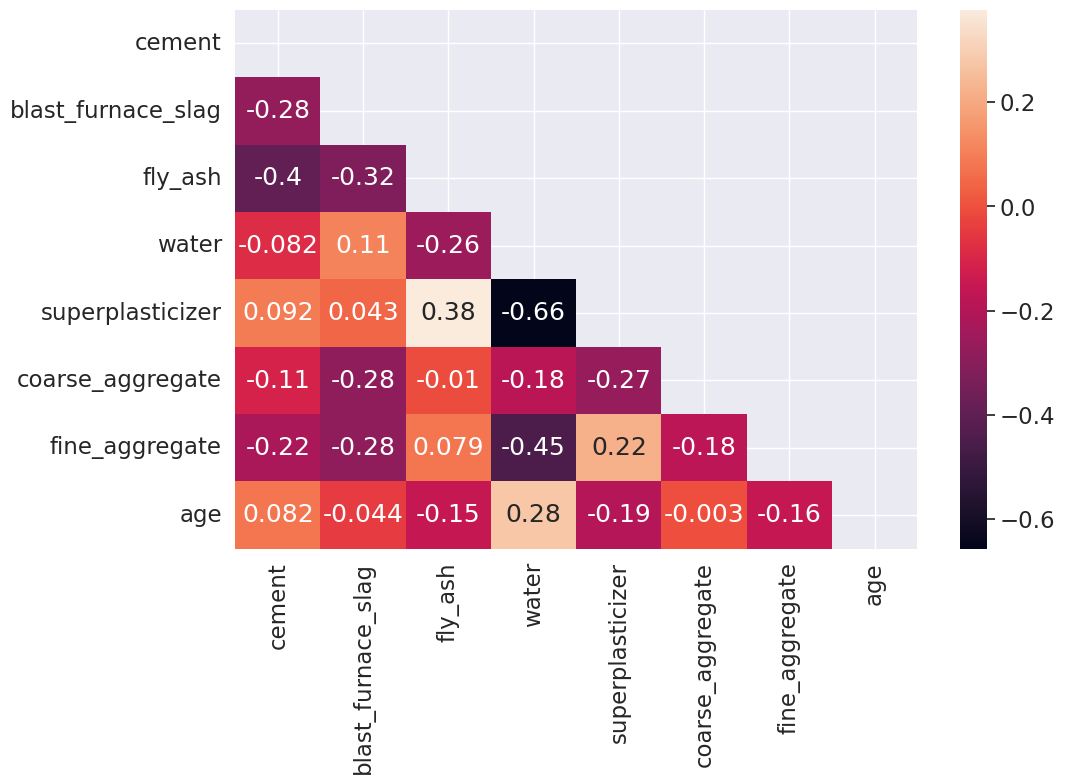

In [ ]:
import matplotlib.pyplot as plt

# The correlation between the features
X_corr = X.corr()
mask = np.triu(np.ones_like(X_corr, dtype='bool'))

plt.figure(figsize=(11, 7))  # Adjust the width and height as desired
sns.heatmap(X_corr, mask=mask, annot=True)
plt.show()


#### correlation between concrete_compressive_strength(label) and the rest (features)

In [ ]:
# correlation between concrete_compressive_strength(label) and the rest (features)
corr=df.corr()
corr['concrete_strength']
correlation_df=pd.Series(corr['concrete_strength']).to_frame()
correlation_df.sort_values(by='concrete_strength',ascending=False)

,concrete_strength
concrete_strength,1.000000
cement,0.497832
superplasticizer,0.366079
age,0.328873
blast_furnace_slag,0.134829
fly_ash,-0.105755
coarse_aggregate,-0.164935
fine_aggregate,-0.167241
water,-0.289633


As we can see cement is more correlated with our target variable. Next scatter plot provides a useful visual representation of the relationship between the two variables and can help in understanding the data and selecting appropriate machine learning algorithms for concrete strength prediction.

### Bivariate analysis Cement Vs our target variable

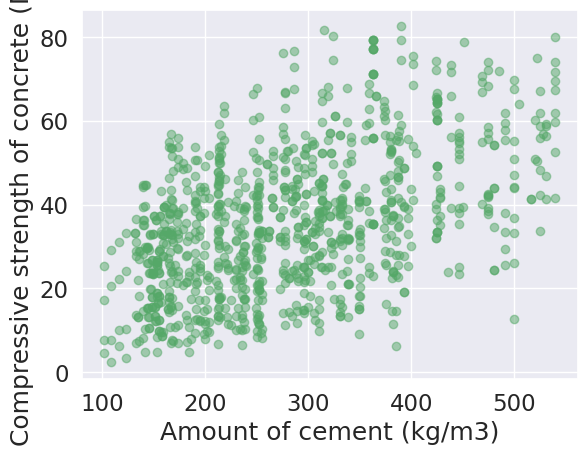

In [ ]:
# Plot the scatter plot for the pair of features
plt.scatter(df['cement'], df['concrete_strength'], color='g', alpha=0.5)
plt.xlabel("Amount of cement (kg/m3)")
plt.ylabel("Compressive strength of concrete (MPa)")
plt.show()

### Multivariate analysis (scatter plot)

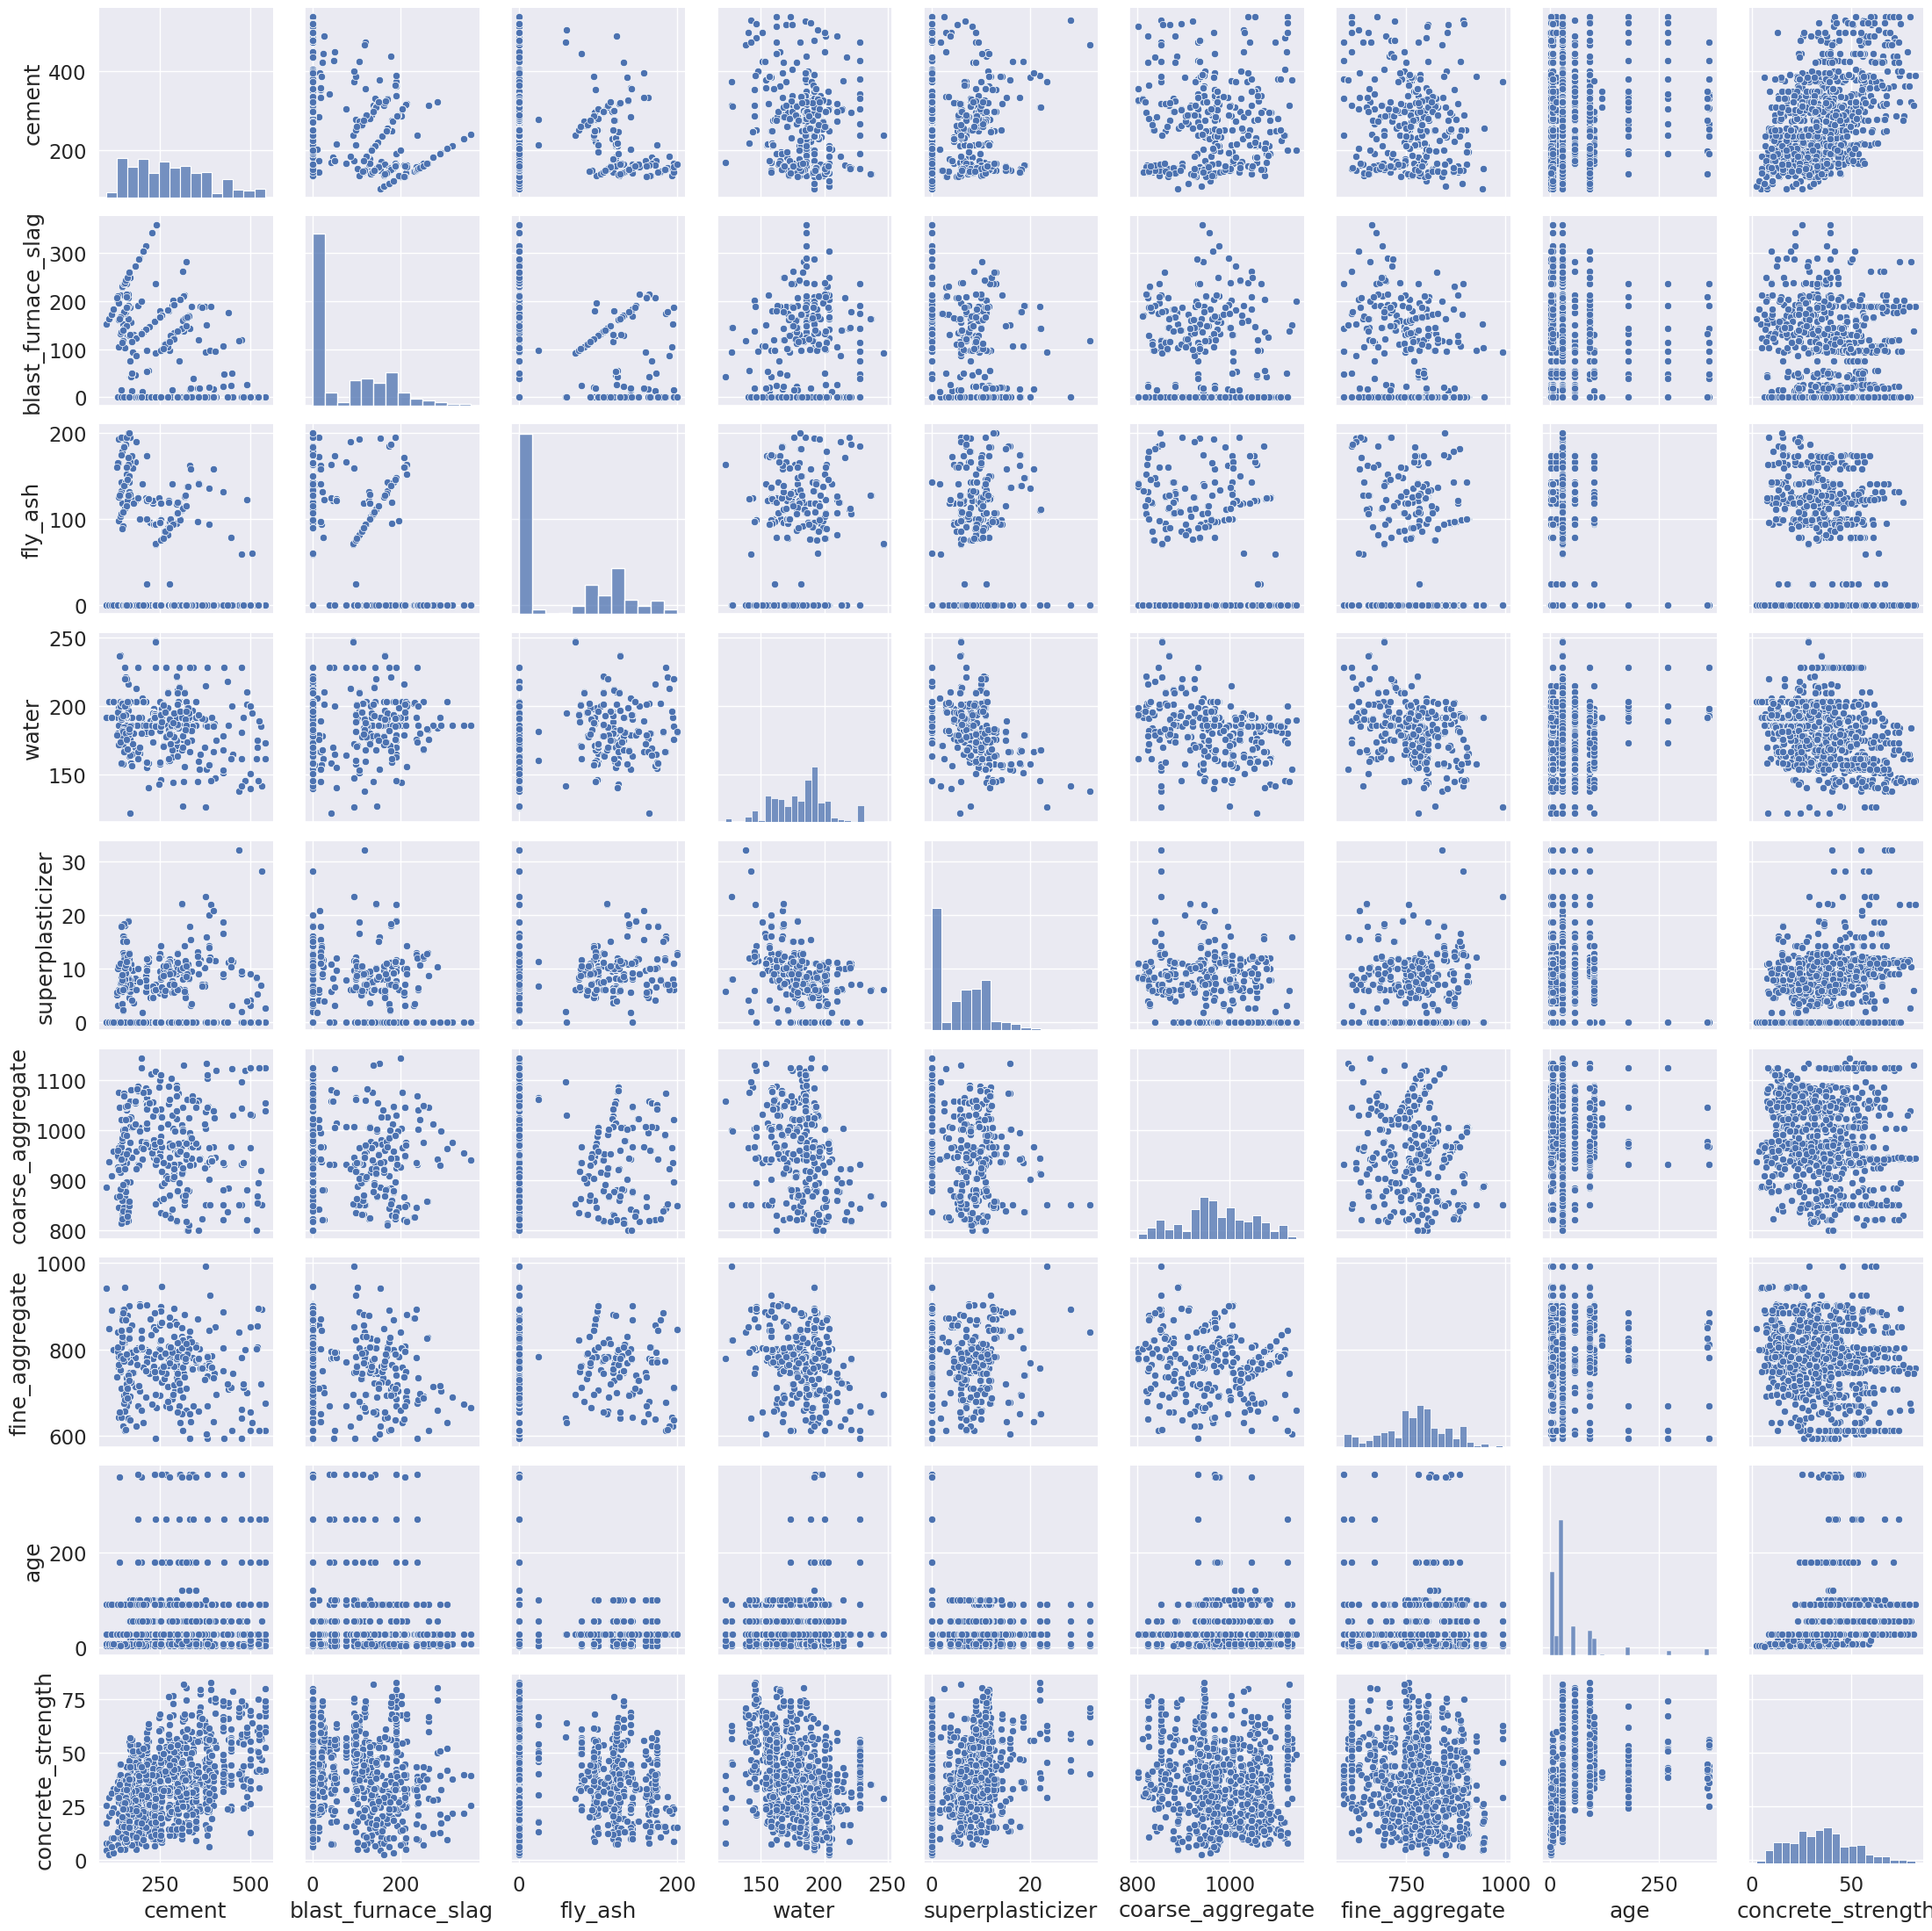

In [ ]:
# Set font scale
sns.set(font_scale=1.5)

# Create pairplot
sns.pairplot(df)

# Show plot
plt.show()

In [ ]:
# select numerical columns
numerical_cols = df.select_dtypes(include=['float', "int"]).columns
# compute the pairwise correlations
df_corr = df[numerical_cols].corr().round(2)

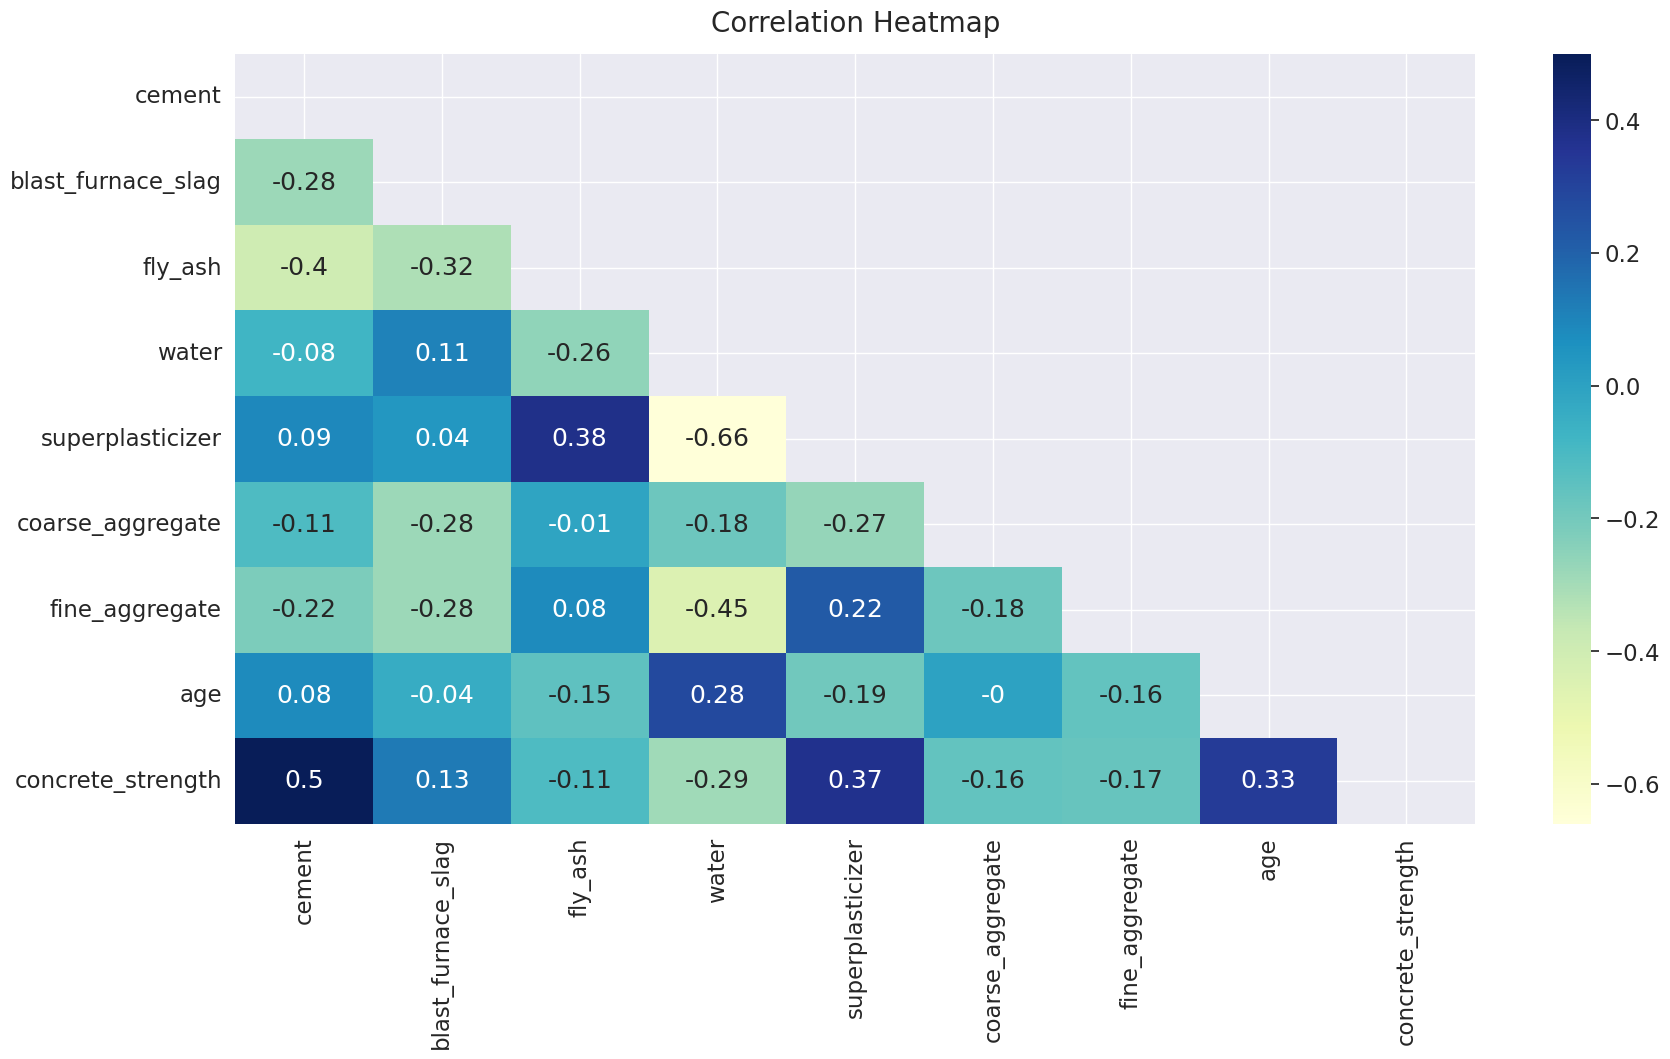

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
#Correlation using heatmap
plt.figure(figsize = (20, 10))
heatmap = sns.heatmap(df_corr, mask=mask, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);
plt.show()

## Regression Model Evaluation

### Spliting The Data

In [ ]:
# assume X and y are our feature matrix and target vector, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### define models

In [ ]:
linreg=LinearRegression()
ridge=Ridge()
lasso=Lasso()
svr=LinearSVR()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
xg_re=xgb.XGBRegressor(objective='reg:linear',n_estimators=10)
ad=AdaBoostRegressor(base_estimator=dt,n_estimators=400)
br=BaggingRegressor(base_estimator=dt,n_estimators=400)
gbr=GradientBoostingRegressor(n_estimators=300,max_depth=1)
rfr=RandomForestRegressor(n_estimators=400)

# define our models
models=[('Linear Regression', linreg),
        ('Ridge Regression', ridge),
        ('Lasso Regression', lasso),
        ('Support Vector Machine', svr),
        ('K Nearest Neighbours', knn),
        ('Decision Tree', dt),
        ('Extreme Gradient Boosting', xg_re),
        ('Ada Boost', ad),
        ('Bagging Regressor', br),
        ('Gradient Boosting', gbr),
        ('Random Forest', rfr)]

# create empty lists to store the evaluation metrics
rmse_list = []
mse_list = []
r2_list = []
model_name_list = []



### Evaluate each model

In [ ]:
# evaluate each model
for model_name, model in models:
    # fit the model
    model.fit(X_train, y_train)
    # make predictions on the test set
    y_pred = model.predict(X_test)
    # calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate R2 score
    r2 = r2_score(y_test, y_pred)
    # append the metrics and model name to the lists
    rmse_list.append(rmse)
    mse_list.append(mse)
    r2_list.append(r2)
    model_name_list.append(model_name)

# create a dictionary with the results
results_dict = {'Model': model_name_list, 'RMSE': rmse_list, 'MSE': mse_list, 'R²': r2_list}

# create a DataFrame from the dictionary
results_df = pd.DataFrame(results_dict)

# print the DataFrame
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[14:27:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



,Model,RMSE,MSE,R²
0,Linear Regression,9.796476,95.970940,0.627553
1,Ridge Regression,9.796474,95.970896,0.627553
2,Lasso Regression,9.795886,95.959391,0.627598
3,Support Vector Machine,15.425305,237.940038,0.076595
4,K Nearest Neighbours,8.294182,68.793454,0.733024
5,Decision Tree,6.681914,44.647980,0.826729
6,Extreme Gradient Boosting,6.318737,39.926434,0.845052
7,Ada Boost,6.766395,45.784101,0.822320
8,Bagging Regressor,5.531073,30.592771,0.881275
9,Gradient Boosting,5.856696,34.300891,0.866884


## Best Model

### Random Forest

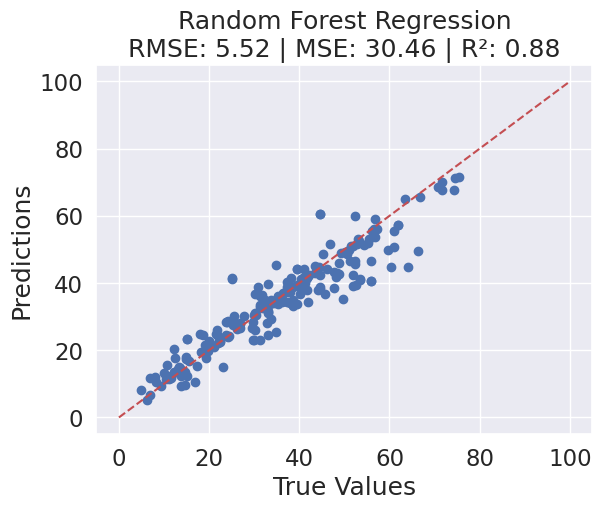

In [ ]:
# train the model
rf_model = RandomForestRegressor(n_estimators=400, random_state=42)
rf_model.fit(X_train, y_train)

# predict the test set values
y_pred = rf_model.predict(X_test)

# calculate the RMSE, MSE, and R2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# create the scatter plot
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], linestyle='--', color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression\nRMSE: {:.2f} | MSE: {:.2f} | R²: {:.2f}'.format(rmse, mse, r2))
plt.show()

### Bagging regressor

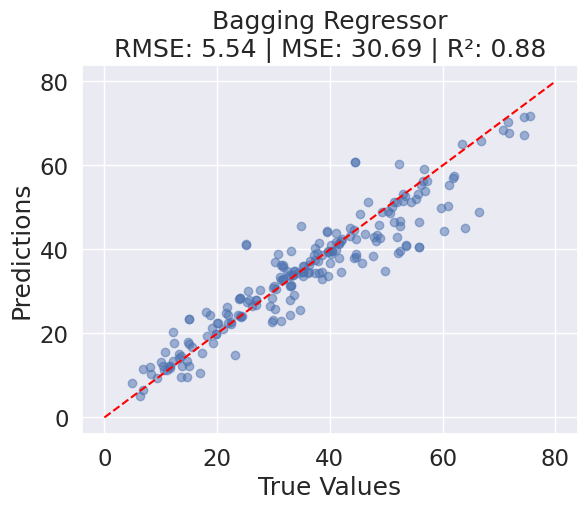

In [ ]:
# Create Bagging Regressor model
model = BaggingRegressor(n_estimators=400, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the concrete strength for the test data
y_pred = model.predict(X_test)

# calculate the RMSE, MSE, and R2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Create scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(0, 80), np.linspace(0, 80), color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.title('Bagging Regressor\nRMSE: {:.2f} | MSE: {:.2f} | R²: {:.2f}'.format(rmse, mse, r2))
plt.show()